In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import pandas as pd

In [51]:
# pd.read_csv('/old labs_qo_files')

In [52]:
df_y1 = pd.read_csv('old_labs_qo_files\CS-D2-Y2.CSV')
df_y2 = pd.read_csv('old_labs_qo_files\CS-D2-Y2.CSV')
df_y3 = pd.read_csv('old_labs_qo_files\CS-D2-Y3.CSV')
df_y4 = pd.read_csv('old_labs_qo_files\CS-D2-Y4.CSV')
df_y5 = pd.read_csv('old_labs_qo_files\CS-D2-Y5.CSV')


In [53]:
dfs = [df_y1, df_y2,df_y3,df_y4,df_y5]

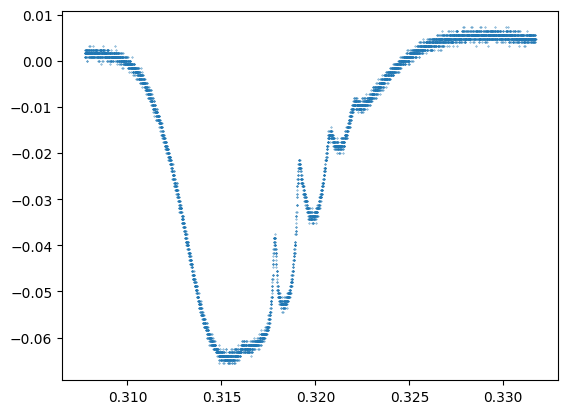

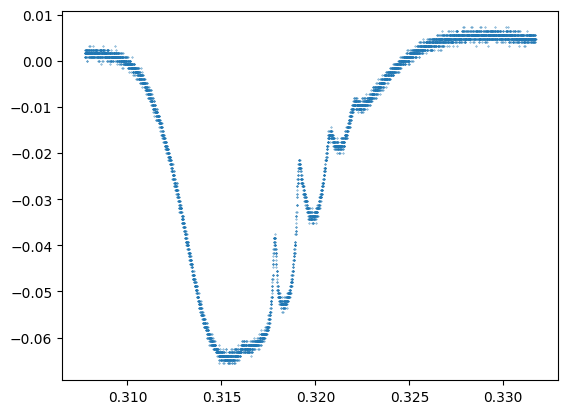

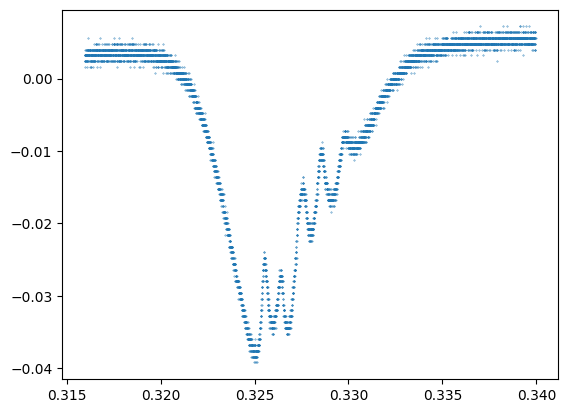

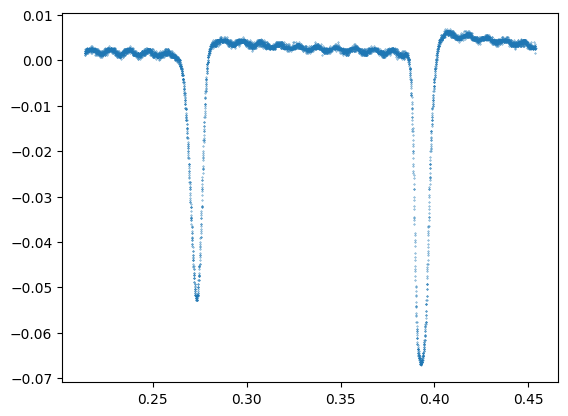

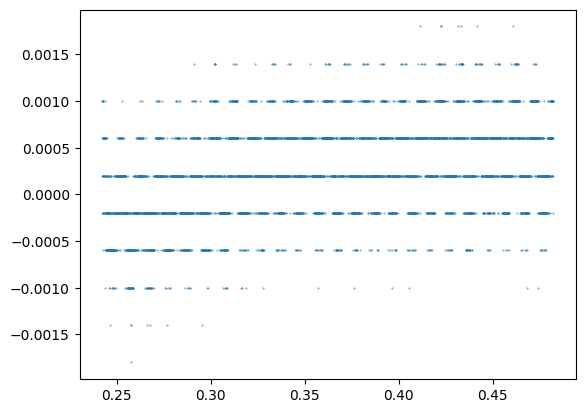

In [54]:
for df in dfs:
    plt.scatter(df['[s]'], df['CH1[V]'], s=0.1)
    plt.show()

(0.27, 0.28)

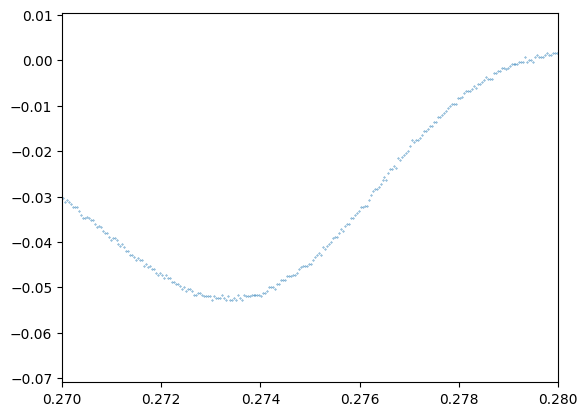

In [55]:
plt.scatter(df_y4['[s]'], df_y4['CH1[V]'],s=0.1)
plt.xlim(0.27,0.28)

(0.27, 0.28)

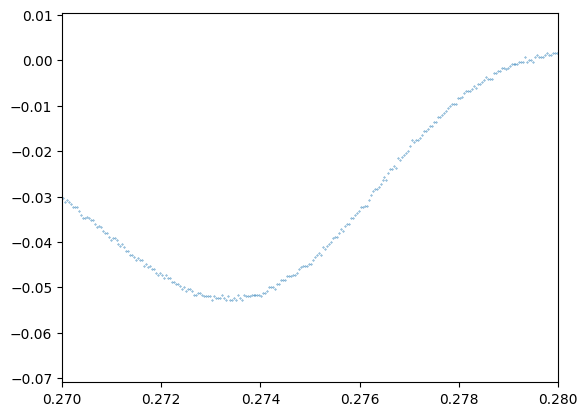

In [56]:
plt.scatter(df_y4['[s]'], df_y4['CH1[V]'],s=0.1)
plt.xlim(0.27,0.28)

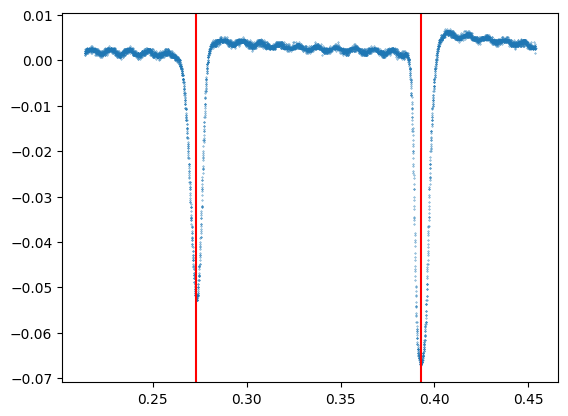

In [57]:
#doppler broadened both dips for subtraction
plt.scatter(df_y4['[s]'], df_y4['CH1[V]'], s=0.1)
# plt.scatter(df_y4['[s]'], df_y4['CH2[V]'], s =0.1)
# plt.scatter(df_y4['[s]'], df_y4['CH2[V]']) #the voltage is decreasing to the left around here
#so the left (shallower) peak is the more energy one so F3 group
#fit gaussian on the smaller peak here
#save params and plot it on top of the one with hyperfine
#deduct the gaussian from the one with hyperfine

plt.axvline(0.392718, color = 'red')
plt.axvline(0.273018, color = 'red')


In [58]:
#time diff between peaks
f = 9.192
time_diff = 0.392718-0.273018
print('time difference between peaks, s', time_diff)
print('energy diff between F3 and F4, GHz', f)
conv_factor = f/time_diff
print('conversion factor GHz per second', conv_factor)

time difference between peaks, s 0.11970000000000003
energy diff between F3 and F4, GHz 9.192
conversion factor GHz per second 76.79197994987467


In [59]:
df_y4.iloc[int(len(df_y4)/2)]

[s]       0.333809
CH1[V]    0.002400
CH2[V]    0.340000
Name: 2998, dtype: float64

In [60]:
#rough approximation peak of bigger dip

index_bigger = (df_y4['CH1[V]'] + 0.073).abs().argmin()
print(index_bigger)
print(df_y4.iloc[index_bigger])

4470
[s]       0.392718
CH1[V]   -0.067200
CH2[V]    0.040000
Name: 4470, dtype: float64


In [61]:
#rough approximation peak of smaller dip
index_bigger = (df_y4['CH1[V]'].iloc[:int(len(df_y4)/2)] + 0.073).abs().argmin()
print(index_bigger)
print(df_y4.iloc[index_bigger])

1479
[s]       0.273018
CH1[V]   -0.052800
CH2[V]    0.680000
Name: 1479, dtype: float64


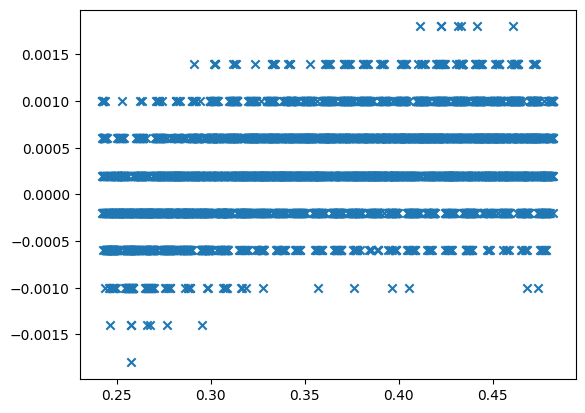

In [62]:
plt.scatter(df_y5['[s]'], df_y5['CH1[V]'], marker = 'x')

# detector noise - moving average filter to remove apparently

In [63]:
#predicting rough transition spectrum
fdash  = [151.21 ,201.24, 251.00]
f = 9.192

In [64]:
f3 = [0, fdash[0], fdash[0]+fdash[1]]
print(f3, 'transition freq relative to F3F\'2')
f3_crossovers = np.zeros(3)
for i in range(3):
    f3_crossovers[i] = (  f3[i] + f3[(i+1)%3] )/2 
print(f3_crossovers, 'crossover freq relative to F3F\'2')

[0, 151.21, 352.45000000000005] transition freq relative to F3F'2
[ 75.605 251.83  176.225] crossover freq relative to F3F'2


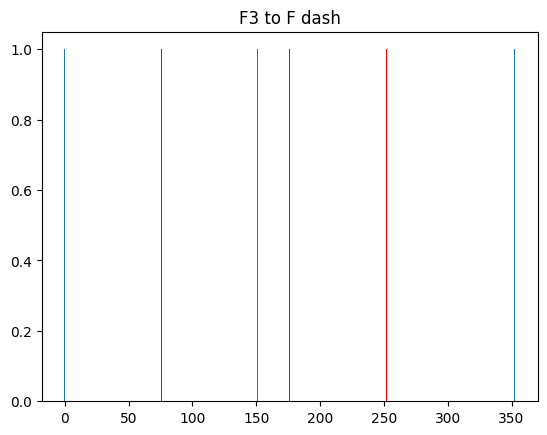

In [65]:
plt.bar(f3, np.ones(3))
plt.bar(f3_crossovers, np.ones(3), color ='red')
plt.title('F3 to F dash')
plt.show()

In [66]:
f4 = [0, fdash[1], fdash[1]+fdash[2]]
print(f4, 'transition freq of F4 group relative to F4F\'2')
f4_crossovers = np.zeros(3)
for i in range(3):
    f4_crossovers[i] = (  f4[i] + f4[(i+1)%3] )/2 
print(f4_crossovers, 'crossover freq of F4 group relative to F3F\'2')

[0, 201.24, 452.24] transition freq of F4 group relative to F4F'2
[100.62 326.74 226.12] crossover freq of F4 group relative to F3F'2


In [67]:
f4

[0, 201.24, 452.24]

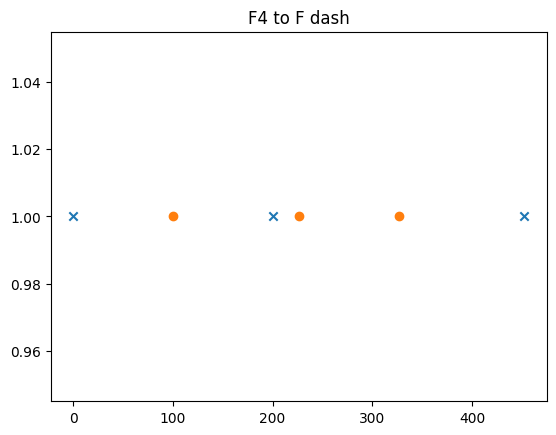

In [68]:
plt.scatter([0, 200.24, 452.24], np.ones(3), marker = 'x')
# plt.bar([0, 200.24, 452.24], np.ones(3))
plt.scatter(f4_crossovers, np.ones(3), marker ='o' )
plt.title('F4 to F dash')
plt.show()

### estimating the hyperfine separations

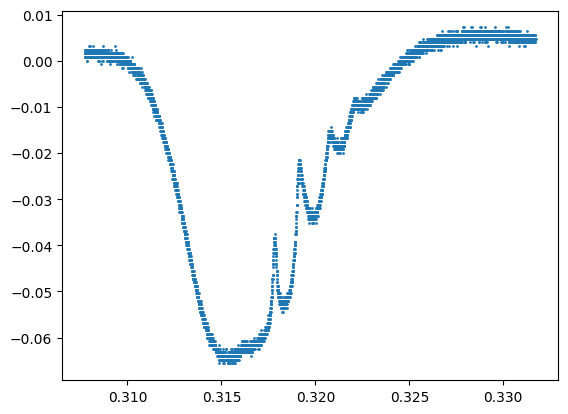

In [69]:
#smaller peak F3 group
plt.scatter(df_y1['[s]'], df_y1['CH1[V]'],s=1)

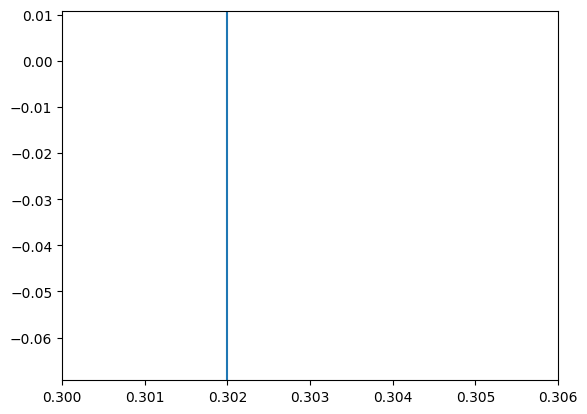

In [70]:
plt.scatter(df_y1['[s]'], df_y1['CH1[V]'], marker = 'x')
plt.xlim(0.3,0.306)
plt.axvline(0.302)

In [71]:


index_bigger = (df_y1['CH1[V]'].iloc[:int(len(df_y1)/2)] + 0.073).abs().argmin()
print(index_bigger)
print(df_y4.iloc[index_bigger])

1786
[s]       0.285304
CH1[V]    0.003600
CH2[V]    0.600000
Name: 1786, dtype: float64


In [72]:
#seconds duration of smaller peak measurement
print(df_y1['[s]'].iloc[-1] - df_y1['[s]'].iloc[0])


0.023996000000000017


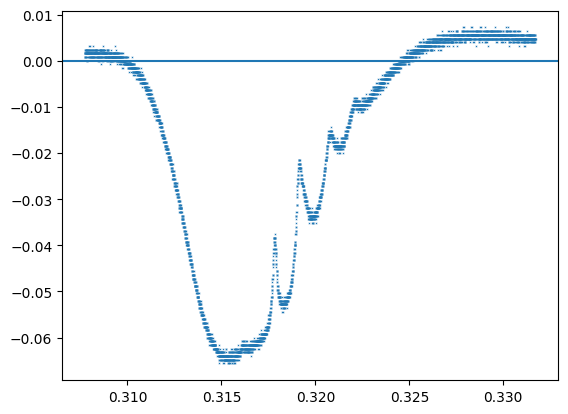

In [73]:
#bigger peak F4
#bigger peak
plt.scatter(df_y2['[s]'], df_y2['CH1[V]'], marker = 'x', s =0.1)
# plt.scatter(df_y2['[s]'], df_y2['CH2[V]'], marker = 'x', s=0.1)
plt.axhline(0)


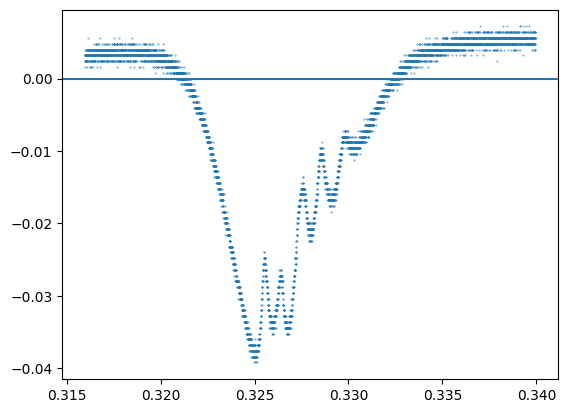

In [74]:
#smaller peak - just recorded twice
plt.scatter(df_y3['[s]'], df_y3['CH1[V]'], s =.1)
# plt.xlim(0.325, 0.334)
# plt.scatter(df_y3['[s]'], df_y3['CH2[V]'], s=.1)
plt.axhline(0)